In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
train_data = "../data/yelpreview/train_tiny_bert.jsonl"

In [39]:
with open(train_data) as f:
    df = pd.read_json(f, lines=True)
df

/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(f, lines=True)
/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(f, lines=True)
/tmp/ipykernel_1694/3721486515.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old b

,0,1,2,3,4,text,label,label_text,pseudo_gt
0,0.000270,0.002674,0.190536,0.647650,0.158869,As soon as I learned that this was once the 'D...,4,great,3
1,0.000312,0.004869,0.458408,0.515569,0.020843,"I like coming to Cane's for chicken fingers, c...",2,okay,3
2,0.074982,0.844869,0.079716,0.000386,0.000047,"Well, finally tried the place with the Green d...",1,bad,1
3,0.001227,0.148607,0.811796,0.037306,0.001065,Went for the brunch Saturday morning and the l...,2,okay,2
4,0.000179,0.002321,0.337382,0.624891,0.035227,Finally a place to watch local sports with sou...,2,okay,3
...,...,...,...,...,...,...,...,...,...
12995,0.997307,0.001519,0.000349,0.000256,0.000570,I wouldn't even give this bar 1 star. went he...,0,terrible,0
12996,0.000079,0.000025,0.000220,0.021803,0.977873,I am a pain in the ass. And I had battery issu...,4,great,4
12997,0.008919,0.683915,0.304495,0.002399,0.000272,2.5 went a weekend with friends that go to veg...,1,bad,1
12998,0.170380,0.783208,0.046032,0.000326,0.000055,A place for happy hour and a spiritied atmosph...,1,bad,1


In [40]:
print(f"Accuracy (PseudoGT vs GT): {sum((df['pseudo_gt']==df['label']))/len(df)}")

Accuracy (PseudoGT vs GT): 0.7671538461538462


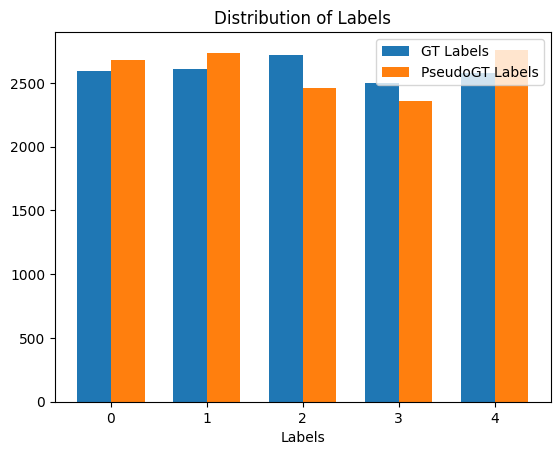

In [41]:
labels = list(set(df['label']))
def count_label(column_name):
    cnt = []
    for l in labels:
        num = len(df.loc[df[column_name]==l])
        cnt.append(num)
    return cnt

pseudo_gt_labels = count_label('pseudo_gt')
gt_labels = count_label('label')

x = np.arange(len(labels))
bar_width = 0.35

fix,ax = plt.subplots()
bars1 = ax.bar(x-bar_width/2, gt_labels, bar_width, label="GT Labels")
bars2 = ax.bar(x+bar_width/2, pseudo_gt_labels, bar_width, label="PseudoGT Labels")

ax.set_xlabel("Labels")
ax.set_title("Distribution of Labels")
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()

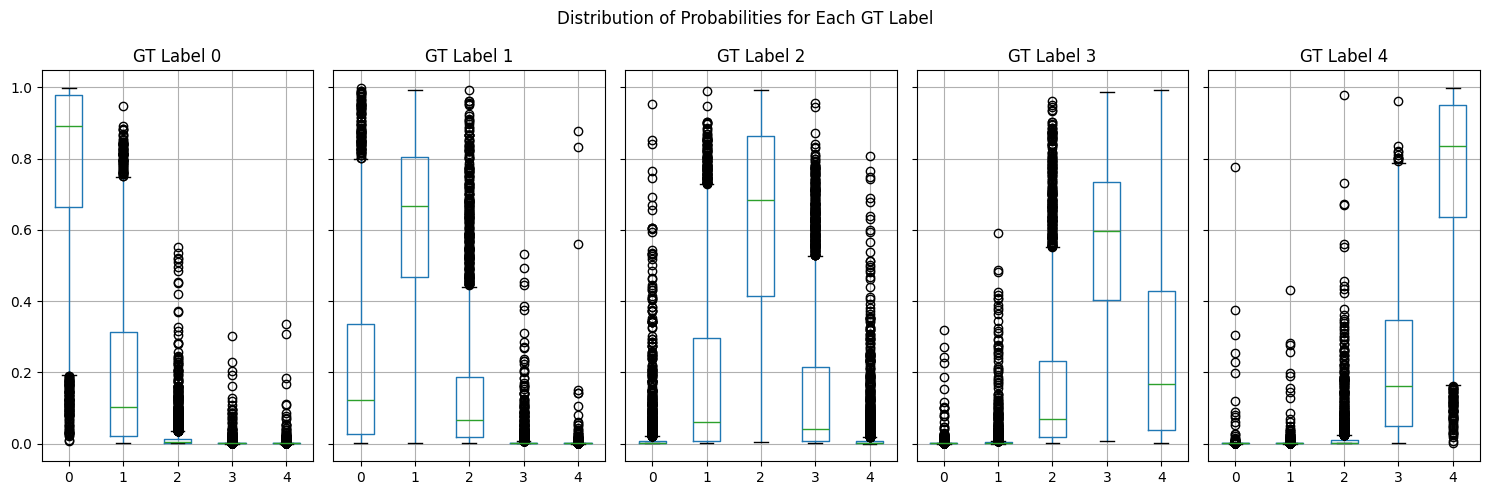

In [42]:
fix, axs = plt.subplots(1, len(labels), figsize=(15,5), sharey=True)
gt_prob = df[['label']+[str(i) for i in labels]]
for i, (label, group) in enumerate(gt_prob.groupby('label')):
    group.drop('label', axis=1).boxplot(ax=axs[i])
    axs[i].set_title(f'GT Label {label}')
plt.suptitle("Distribution of Probabilities for Each GT Label")
plt.tight_layout()
plt.show()

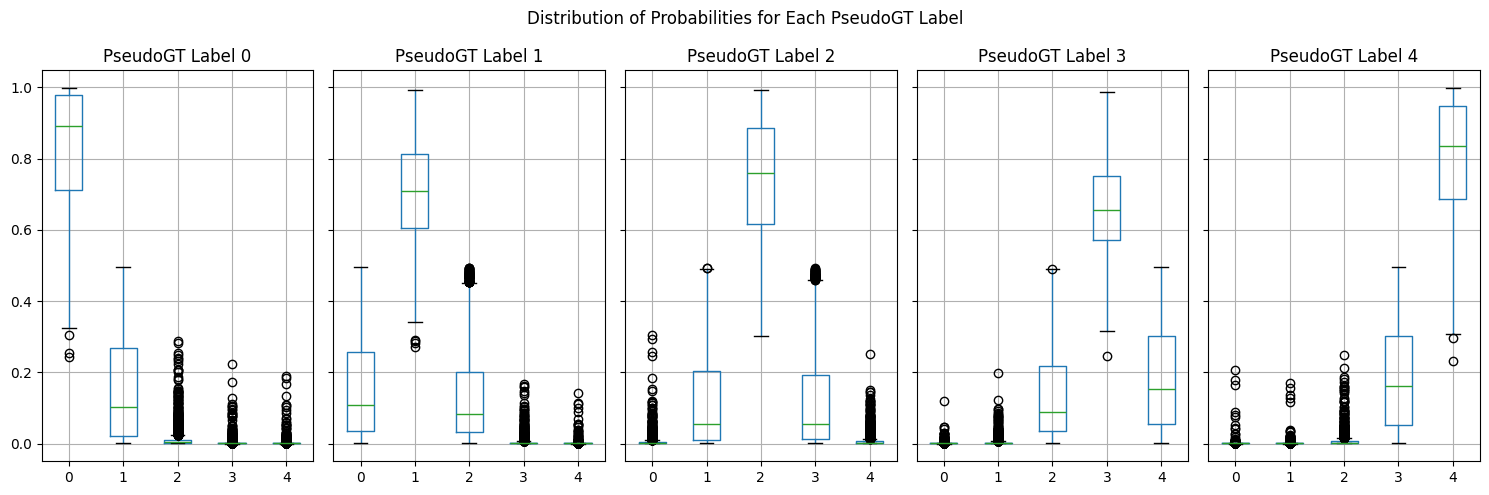

In [43]:
fix, axs = plt.subplots(1, len(labels), figsize=(15,5), sharey=True)
pseudo_gt_prob = df[['pseudo_gt']+[str(i) for i in labels]]
for i, (label, group) in enumerate(pseudo_gt_prob.groupby('pseudo_gt')):
    group.drop('pseudo_gt', axis=1).boxplot(ax=axs[i])
    axs[i].set_title(f'PseudoGT Label {label}')
plt.suptitle("Distribution of Probabilities for Each PseudoGT Label")
plt.tight_layout()
plt.show()